In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sys
sys.path.append('../src')
# plt.style.use('dark_background')
import data
from viz import *
import itertools
from sklearn import mixture
from matplotlib_venn import venn3
import viz
outcome_def = 'y_consec_thresh'

# process original data

In [2]:
dset_orig = 'clath_aux+gak_a7d2'
df_orig = data.get_data(dset=dset_orig)  # save out orig

loading + preprocessing data...
	loading tracks...
	 /accounts/projects/vision/chandan/auxilin-prediction/src/../data/tracks/tracks_clath_aux+gak_a7d2.pkl /scratch/users/vision/data/abc_data/auxilin_data_tracked
	preprocessing data...
	adding features...


/accounts/projects/vision/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/accounts/projects/vision/.local/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


	saving...


In [3]:
df_orig = df_orig[df_orig['valid']] # exclude test cells, short/long tracks, hotspots
feat_names = data.get_feature_names(df_orig)
feat_names = data.select_final_feats(feat_names)
print('num feats', len(feat_names))
print(feat_names)

num feats 17
['mean_total_displacement', 'mean_square_displacement', 'lifetime', 'X_max', 'X_min', 'X_mean', 'X_std', 'X_peak_time_frac', 'rise', 'fall', 'rise_slope', 'fall_slope', 'max_diff', 'min_diff', 'X_d1', 'X_d2', 'X_d3']


# process new data

In [4]:
# process new data (using lifetime thresholds from original data)
outcome_def = 'y_consec_sig'
dfs = []
# for dset in ['clath_aux_dynamin']:
for dset in [d in config.DSETS.keys() if not 'pi4p' in d]: #['clath_aux+gak']: #
    try:
#         df = data.get_data(dset=dset, previous_meta_file=None, use_processed=False)
        df = data.get_data(dset=dset, previous_meta_file=f'{config.DIR_PROCESSED}/metadata_{dset_orig}.pkl')
        print(dset, 'num cells', len(df['cell_num'].unique()), 'num tracks', df.shape[0], 'num aux+',
              df[outcome_def].sum(), 'aux+ fraction', (df[outcome_def].sum() / df.shape[0]).round(3),
              'valid', df.valid.sum(), 'valid aux+', df[df.valid][outcome_def].sum(), 'valid aux+ fraction',
              (df[df.valid][outcome_def].sum() / df.valid.sum()).round(3))
        dfs.append(df)
    except:
        print('failed', dset)

	adding features...


/accounts/projects/vision/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/accounts/projects/vision/.local/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


	saving...
ap2_pi4p num cells 9 num tracks 11622 num aux+ 5928 aux+ fraction 0.51 valid 1347 valid aux+ 961 valid aux+ fraction 0.713


# check data stats

In [7]:
for dset in config.DSETS.keys(): #['clath_aux+gak']: #
    df = data.get_data(dset=dset)
    print(dset, 'num cells', len(df['cell_num'].unique()), 'num tracks', df.shape[0], 'num aux+',
              df[outcome_def].sum(), 'aux+ fraction', (df[outcome_def].sum() / df.shape[0]).round(3),
              'valid', df.valid.sum(), 'valid aux+', df[df.valid][outcome_def].sum(), 'valid aux+ fraction',
              (df[df.valid][outcome_def].sum() / df.valid.sum()).round(3))

clath_aux+gak_a7d2 num cells 8 num tracks 10091 num aux+ 2225 aux+ fraction 0.22 valid 2936 valid aux+ 1193 valid aux+ fraction 0.406
clath_aux+gak num cells 8 num tracks 7649 num aux+ 1947 aux+ fraction 0.255 valid 1721 valid aux+ 953 valid aux+ fraction 0.554
clath_aux+gak_a7d2_new num cells 10 num tracks 67729 num aux+ 8770 aux+ fraction 0.129 valid 7010 valid aux+ 3147 valid aux+ fraction 0.449
clath_aux_dynamin num cells 30 num tracks 210587 num aux+ 18001 aux+ fraction 0.085 valid 31762 valid aux+ 7679 valid aux+ fraction 0.242
clath_aux+gak_new num cells 10 num tracks 20833 num aux+ 3053 aux+ fraction 0.147 valid 2899 valid aux+ 1322 valid aux+ fraction 0.456
clath_gak num cells 9 num tracks 18645 num aux+ 3210 aux+ fraction 0.172 valid 3132 valid aux+ 1191 valid aux+ fraction 0.38
clath_pi4p_notreatment num cells 4 num tracks 12374 num aux+ 5765 aux+ fraction 0.466 valid 924 valid aux+ 742 valid aux+ fraction 0.803
ap2_pi4p num cells 9 num tracks 11622 num aux+ 5928 aux+ fracti

# visualize differences

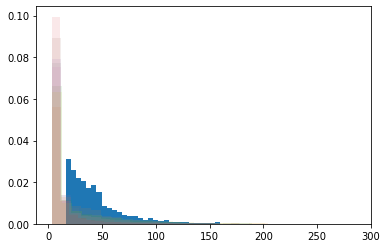

In [6]:
plt.hist(df_orig.lifetime, alpha=1, density=True, bins=30)
for df in dfs:
    plt.hist(df.lifetime, density=True, bins=30, alpha=0.1)